In [97]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data=pd.read_csv('heart_disease.csv')
labels=data.values[:,-1]
labels[labels>1]=1
labels=labels.astype(int)

data=data.values[:,:-1]



In [5]:
data.shape


(303, 13)

In [98]:
# Only run before decision boundary visualization
data=data[:,[3,7]]

In [ ]:
#Standardize data (substract mean divide with std)
#data=

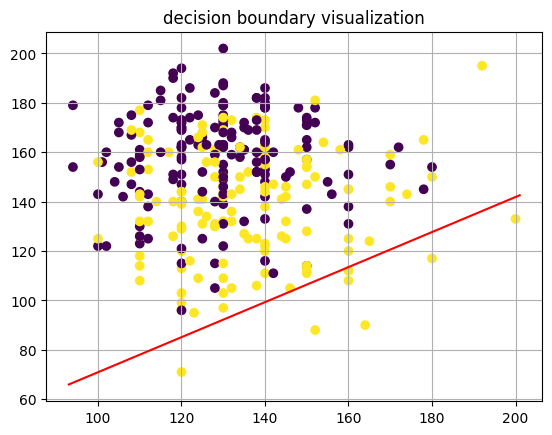

In [102]:
import matplotlib.pyplot as plt

def visualize(data,labels,w,b, colour=labels):
  w1=0
  w2=1

  x_min, x_max = data[:, w1].min() - 1, data[:, w1].max() + 1
  x= np.linspace(x_min,x_max)
  y = -(b/w[w2])-w[w1]/w[w2]*x


  plt.plot(x, y, '-r')

  plt.scatter(data[:,w1],data[:,w2],c=colour,marker='o')

  plt.title('decision boundary visualization')

  plt.grid()
  plt.show()

visualize(data,labels,lr.get_w_hat(),lr.get_bias())


In [121]:
class LogisticRegression():
    def __init__(self):
        self.w_hat = None
        self.bias = None
        self.lr = 0.01

        #takes all each train with predict data
        self.each_train = None

    def fit(self,data,labels,max_iterations=500):
        self.each_train =[]

        n_samples, n_features = data.shape
        
        self.w_hat = np.zeros(n_features)
        self.bias=0

        for i in range(max_iterations):
          #for __ in range(0,max_iterations, 16):

            lin_model= np.dot(data,self.w_hat)+self.bias
            y_pred = self.sigmoid(lin_model)
            dw = self.error_gradient(data,labels,y_pred)
            
            db =  np.sum(y_pred - labels)

            self.w_hat -= self.lr* dw
            self.bias -= self.lr * db

            self.each_train.append([self.predict(data),self.w_hat,self.bias])


    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def binary_cross_entropy(self,true,prediction):
        #return np.log(1+np.exp(-true*self.w_hat*data))
        pass
    def error_gradient(self,data,true,prediction):
        dw =  np.dot(data.T, (prediction - true))
        return dw


    def predict(self,data):
        linear_model = np.dot(data, self.w_hat)+self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_predicted_cls)
    def accuracy(self,true,prediction):         
      return np.sum(true== prediction) / true.shape[0]

    def get_w_hat(self):
      return self.w_hat
    def get_bias(self):
      return self.bias
    def get_each_train_(self):
      return self.each_train
    

 

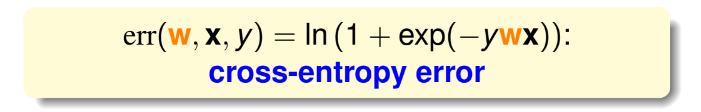

In [124]:
def train_test_split(data,labels):
    arr_rand = np.random.rand(data.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)

    X_train = data[split]
    y_train = labels[split]
    X_test =  data[~split]
    y_test = labels[~split]

    #print len(X_Train), len(y_Train), len(X_Test), len(y_Test)
    return X_train, X_test,y_train, y_test

In [125]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels)

lr=LogisticRegression()
lr.fit(train_data,train_labels)
prediction_in=lr.predict(train_data)
prediction_out=lr.predict(test_data)
print(lr.accuracy(train_labels,prediction_in))
print(lr.accuracy(test_labels,prediction_out))


0.6320754716981132
0.5274725274725275


[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 